<font color="#4169E1" face="Montserrat" size="+8"><h1>CZ3005 Artificial Intelligence Project 1</h1></font>

<br>

<font color=""><h3>Lab group: **A34**</h3></font>
 
<br>

<font color=""><h3>Done by:</h3></font>
<font color=""><p>Ryan Khong U2022317A</p></font>
<font color=""><p>Shannen Lee U2021991G</p></font>
<font color=""><p>Saniya Nangia U2022557J</p></font>

<br>


<font color="#FF5733"><h3> ***Equal*** Contribution by all members</h3></font>



---



<font color="#228B22" face="Montserrat" size="+3"><h1>Problem description</h1></font>

As shown in the figure below, a pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. 

The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart. In this project, we developed a Reinforcement Learning (RL) agent. 

The trained agent makes the decision to push the cart to the left or right based on the cart position, velocity, and the pole angle, angular velocity.
 
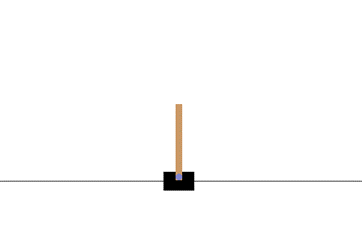

Figure 1. Balancing a pole on a cart.


---


<font color="#228B22" face="Montserrat" size="+4"><h1>**Task 1:**</h1></font>

Development of an RL agent. Demonstrate the correctness of the implementation by sampling a random state from the cart pole environment, inputting to the agent, and outputting a chosen action. Print the values of the state and chosen action in Jupyter notebook.
(30 marks)






---

<font color="#89CFF0" face="Montserrat" size="+3"><h1>Step 1: Installing and importing dependencies</h1></font>




In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




---

<font color="#89CFF0" face="Montserrat" size="+3"><h1>Step 2: Loading CartPole-v1 environment from the OpenAI Gym library</h1></font>




In [ ]:
env = gym.make("CartPole-v1")



---

<font color="#89CFF0" face="Montserrat" size="+3"><h1>Step 3: Development of RL Agent</h1></font>


<font color="#6d5e9c" face="Montserrat" size="+4"><h2>Q-Learning </h2></font> 

<font  face="Montserrat" size="+1"><p>Our team decided to utilise **Q-Learning** as our reinforcement learning agent as it was a **Bootstrap method**, which is a method of inferring results for a population from results found on a collection of smaller random samples of the population, using replacement during the sampling process.
</p></font> 

<br> 
<font  face="Montserrat" size="+1"><p>
It is also a **model-free** reinforcement learning, where the agent uses predictions of the environment’s expected response to take an action.
</p></font> 


<font  face="Montserrat" size="+1"><p>
An interesting thing to mention is that Q-learning, a form of temporal differencing method is **capable of learning from incomplete sequences**, which means that it can also be used in continuous problems like this (though we will take a discrete approach to our problem as later mentioned!)
</p></font> 


<font  face="Montserrat" size="+1"><p>
Q learning also tends to be **more efficient and has less variance** than Monte Carlo.
</p></font> 


---

<font color="#b19cd9" face="Montserrat" size="+2"><h2>1. Hyper-parameters </h2></font> 

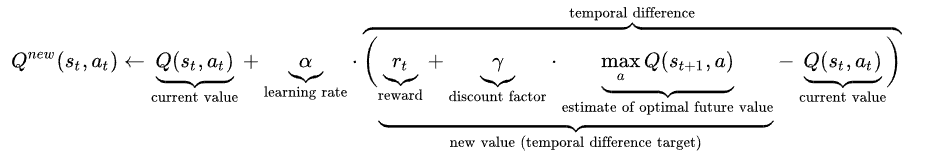



<font face="Montserrat" size="+1"><p>The hyper-parameters to be tuned in Q-Learning are:

*   ***Alpha (Learning Rate)***

  Learning rate determines how much of the new learned value should be used in updating Q(s,a). A lower learning rate results in a more stable training process, but decreases the convergence speed.

*   ***Epsilon (Exploration Rate)***

  Exploration Rate refers to the random probability that we will deviate and choose an action that does not exploit what we have learned so far. There needs to be a balance between exploration and exlpoitation so that the agent can discover better policies, but also have a stable learning process. Under the epsilon-greedy policy, the value of epsilon is decreased over time.

*   ***Gamma (Discount Factor)***

  Discount factor controls how much of an emphasis we place on future rewards. A higher discount factor gives more weight to future rewards.

*   ***Number of Episodes***

  
*   ***Number of Bins***

Bins are used for discretization, which will be explained in point 2.




</p></font>

---
<font color="#4169E1" face="Montserrat" size="+3"><h2>Additional effort: </h2></font>

<font face="Montserrat" size="+1"><p>In the following tables, we ran multiple Q-Learning algorithms, keeping all but one hyperparamter constant, in order to **find the optimum value for the hyperparameter**. Highlighted entries indicate the hyperparameter value that returned the best training reward. </p></font>

<br> 

<font face="Montserrat" size="+1"><p>We used the metric of the average training reward to predict whether our model would eventually perform well in the test stage. The average training reward was calculated by taking the cumulative rewards over all the episodes, and dividing it by the number of episodes. </p></font>

<br>

<font face="Montserrat" size="+1"><p>We implemented several other hyperparameter variations (having smaller increments) in the process of arriving at the optimal ones. However, the corresponding values of the average training reward did not have much significance to our analysis, and hence those variations were not included in the below tables. </p></font>





<font color="#b19cd9" face="Montserrat" size="+2"><h2> Learning Rate: </h2></font>

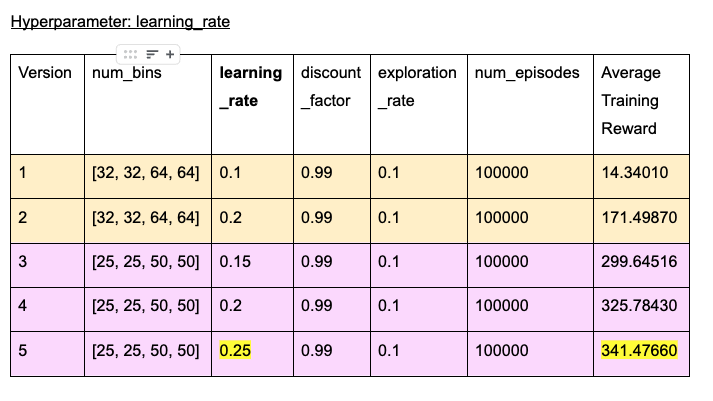

<font color="#b19cd9" face="Montserrat" size="+2"><h2> Discount Factor: </h2></font>

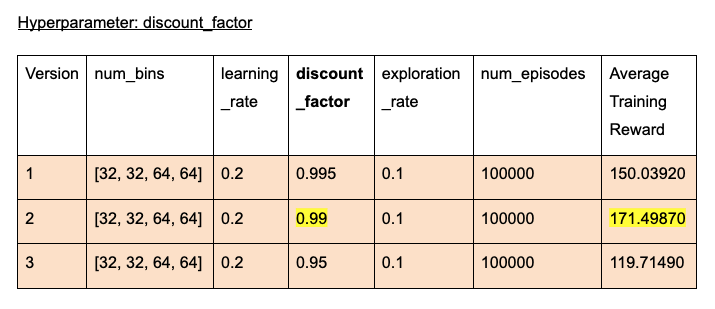


<font color="#b19cd9" face="Montserrat" size="+2"><h2> Exploration Rate: </h2></font>

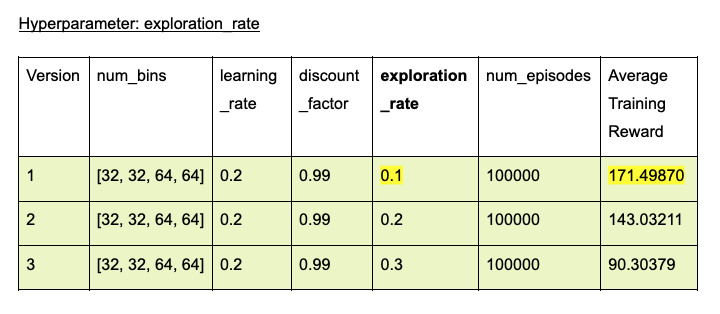


<font color="#b19cd9" face="Montserrat" size="+2"><h2> Number of Episodes: </h2></font>

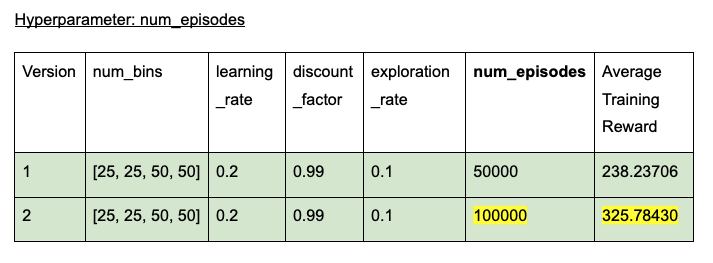



<font color="#b19cd9" face="Montserrat" size="+2"><h2> Number of Bins: </h2></font>

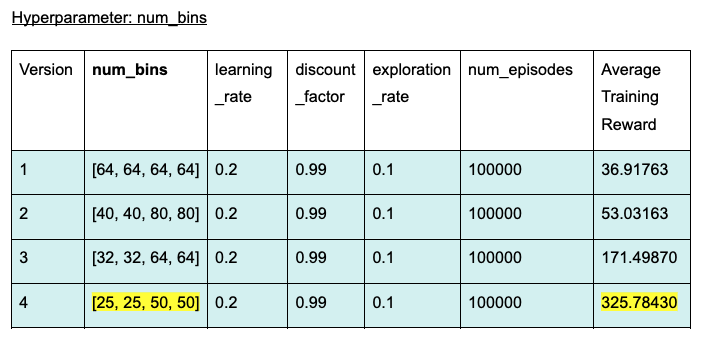


In [ ]:
# Define the number of bins for each observation dimension
num_bins = [25, 25, 50, 50]

# Determine the number of possible actions in the environment
num_actions = env.action_space.n

# Initialize the Q-table with zeros for all state-action pairs
Q_table = np.zeros(num_bins + [num_actions])

# Set the learning rate, discount factor, exploration rate, and number of episodes
learning_rate = 0.25
discount_factor = 0.99
exploration_rate = 0.1
num_episodes = 100000


---
<font color="#b19cd9" face="Montserrat" size="+2"><h2>2. Discretization and Bins </h2></font> 
 




<font  face="Montserrat" size="+1"><p>
In the lecture, there was no need for discretisation because states were unique (being in (1,1) and (1,2) etc is distinct), as shown in the figure below. </p></font>

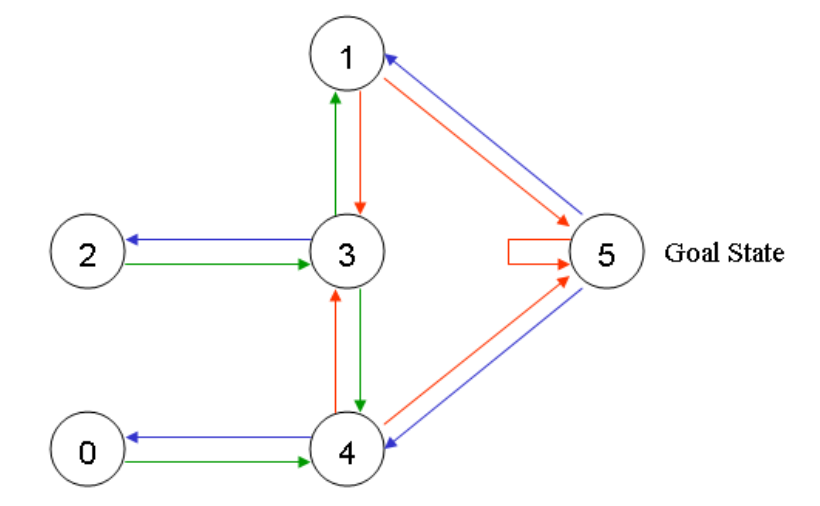

<br>

<font face="Montserrat" size="+1"><p>However, in this case of the cartpole, not only are there **4 variables that collectively define the state**, all of them are real numbers, which means that there are an infinite number of states.  We can **translate this problem to be a discrete problem through Discretisation**.</p></font>

<br>

<font  face="Montserrat" size="+1"><p>
In order to have a valid Q(s,a) table, we therefore have to **limit the number of states** that can exist. Hence, we defined **bins** of values to categorize the states from the minimum to the maximum of each variable.</p></font>

<br>

<font  face="Montserrat" size="+1"><p>In general, when the number of bins is increased, the RL agent performs better since it has a tighter value range for each bin and chooses a more appropriate action. However, there is a tradeoff as having more bins is also more computational expensive and often requires a greater number of episodes in order to be effective.</p></font>

<br>

<font  face="Montserrat" size="+1"><p>The agent employs a **"static" epsilon-greedy policy**, whereby the value of epsilon does not decay over time. The agent either randomly selects an action to take, or relies on entries in the Q-table, to create a balance between exploration and exploitation. This results in a transition to a new state and the Q-table being updated based on the observed rewards. </p></font>

<br>

<font  face="Montserrat" size="+1"><p>As the agent continues training (and a sufficiently high number of episodes has been completed), the probability of the agent reaching a state it has not encountered decreases. If a random action is not chosen, the agent is more likely to take a sequence of actions that lead to higher rewards as the number of episodes increases. </p></font>

<br>

<font  face="Montserrat" size="+1"><p>In the test stage, the epsilon-greedy strategy is no longer used. The agent wholly relies on the Q-table to select an action, even if the agent is randomly assigned a state it has not encountered before (selects random action since 0 reward is associated with all actions). However, the chosen action could lead the agent to a state it has actually encountered before. The agent would then select a corresponding action with the highest expected reward from the Q-table based on previous training iterations. </p></font>




---

<font color="#b19cd9" face="Montserrat" size="+2"><h2>Derivation of upperbound and lowerbound list for the four state variables
 </h2></font>  




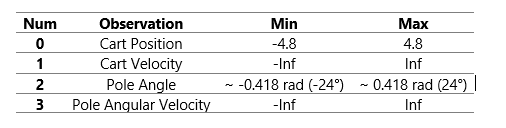







<font face="Montserrat" size="+2"><p>
[ **Cart Position** , **Cart Velocity** , **Pole Angle** , **Pole Angular Velocity** ]
</p></font>

<font face="Montserrat" size="+1"><p>
upper_bounds = [ env.observation_space.high[0] , 0.5 , env.observation_space.high[2] , np.radians(50) / 1. ]
</p></font>

<font face="Montserrat" size="+1"><p>
lower_bounds = [ env.observation_space.low[0] , -0.5 , env.observation_space.low[2], -np.radians(50) / 1. ]
</p></font>

<font  face="Montserrat" size="+1"><p>
* The bounds for ***Cart Position*** and ***Pole Angle*** are taken directly from the environment's observation space.
* The bounds for ***Cart Velocity*** are manually chosen values that represents the maximum allowed deviation of the cart from the center of the track. 
* The bounds for ***Pole Angular Velocity*** are manually chosen values that represents the maximum allowed deviation of the pole from the vertical position, in radians. The np.radians(50) converts the angle in degrees to radians, and the division by 1. is to force the result to be a floating-point value.</p></font>

In [ ]:
# Discretize the continuous observation space into discrete states using bins

def discretize(observation):

    # Define the upper and lower bounds of each dimension of the observation space
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50) / 1.]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50) / 1.]
    
    # Calculate the ratios of the observation values to the range of each dimension
    ratios = []
    for i in range(len(observation)):
        observation_range = upper_bounds[i] - lower_bounds[i]
        observation_ratio = (observation[i] + abs(lower_bounds[i])) / observation_range
        ratios.append(observation_ratio)
    
    # Calculate the index of each observation value in its corresponding bin
    bin_indexes = []
    for i in range(len(observation)):
        bin_index = int(round(ratios[i] * (num_bins[i] - 1)))
        bin_indexes.append(bin_index)
    
    # Ensure that each bin index is within the valid range
    valid_bin_indexes = []
    for i in range(len(observation)):
        valid_bin_index = min(num_bins[i] - 1, max(0, bin_indexes[i]))
        valid_bin_indexes.append(valid_bin_index)
    
    # Return the tuple of valid bin indices as the discrete observation
    discrete_observation = tuple(valid_bin_indexes)
    return discrete_observation



---
<font color="#b19cd9" face="Montserrat" size="+2"><h2>3. Implementation of Q-Learning Algorithm </h2></font> 



<font face="Montserrat" size="+1"><p> Our implementation of the Q Learning algorithm is the same one as the one in the lectures. </p></font> 

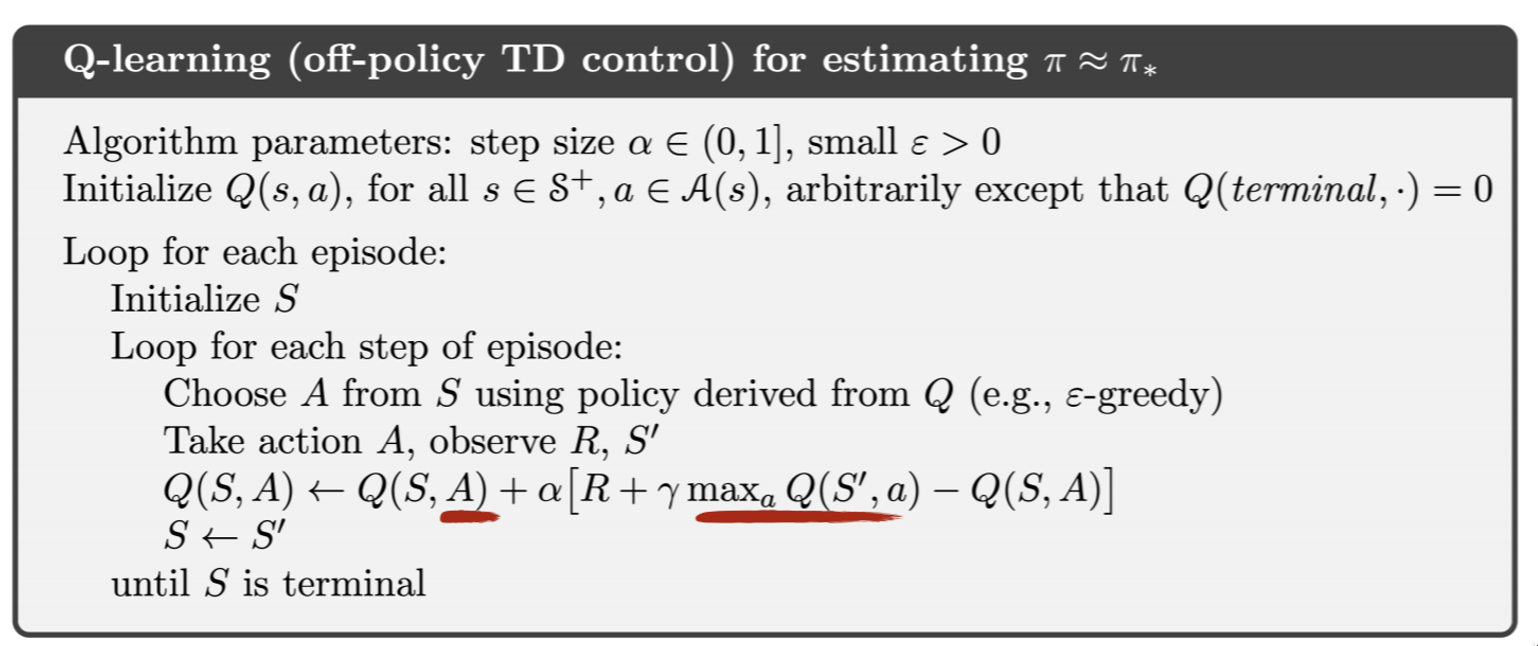


In [ ]:
# Q-Learning Algorithm

# Loop through for num_episodes
for episode in range(num_episodes):

    # Reset the environment and discretize the initial state
    state = discretize(env.reset())

    done = False

    while not done:

        # Choose an action using epsilon-greedy policy
        if np.random.random() < exploration_rate:

            # Exploration: choose a random action
            action = env.action_space.sample()

        else:

            # Exploitation: choose the action with the highest Q-value
            action = np.argmax(Q_table[state])

        # Take action and observe next state and reward
        next_state, reward, done, info = env.step(action)
        next_state = discretize(next_state)

        # Update Q-table using the Q-learning formula
        Q_table[state][action] += learning_rate * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[state][action])
        
        # Update the current state
        state = next_state
    


---
<font color="#b19cd9" face="Montserrat" size="+2"><h2>4. Testing of agent on a random state </h2></font> 

In [ ]:
# Test the agent on a random state

observation = env.reset()
action = np.argmax(Q_table[discretize(observation)])
print("Observation:", observation)
print("Chosen action:", action)

Observation: [0.01705053 0.0112952  0.01623117 0.01490693]
Chosen action: 1


---




<font color="#228B22" face="Montserrat" size="+3"><h1>**Task 2:**</h1></font>

Demonstrate the effectiveness of the RL agent. Run for 100 episodes (reset the environment at the beginning of each episode) and plot the cumulative reward against all episodes in Jupyter. Print the average reward over the 100 episodes. The average reward should be larger than 195.
(40 marks) 



<font color="#b19cd9" face="Montserrat" size="+2"><h2>Running the RL agent for 100 episodes </h2></font> 

In [ ]:
import statistics
num_episodes = 0
all_rewards = []

# Loop through for 100 episodes
while num_episodes != 100:

    total_reward = 0 
    done = False

    # Reset the environment and discretize the initial observation
    observation = env.reset()
    state = discretize(observation)

    # print("Round " + str(num_episodes) + "\n" + "Initial observations:", observation)
    
    # Loop through until the episode is finished
    while not done:

        # Choose the action with the highest Q-value for the current state
        action = np.argmax(Q_table[state])
        observation, reward, done, info = env.step(action)

        # Discretize the new observation
        state = discretize(observation)

        total_reward += reward
    
    # print("Cumulative reward for this round:", total_reward)
    all_rewards.append(total_reward)
    num_episodes += 1

<font color="#b19cd9" face="Montserrat" size="+2"><h2>Graph of cumulative reward against all 100 episodes and the average cumulative reward </h2></font> 


Average Cumulative Reward: 500.0
Is my agent good enough? True 



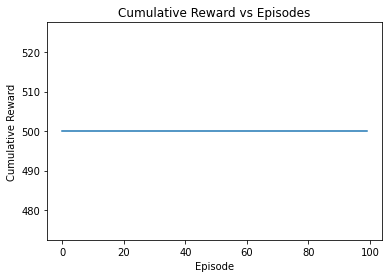

In [ ]:
# Obtaining the average cumulative reward by taking the mean of the cumulative rewards of the episodes
avg_reward = statistics.mean(all_rewards)
print("\nAverage Cumulative Reward:", avg_reward)
print("Is my agent good enough?", avg_reward > 195,"\n")

# Converting the list to a numpy array to plot the graph
all_rewards = np.array(all_rewards)

# Plot cumulative reward against all episodes
plt.plot(all_rewards)
plt.title('Cumulative Reward vs Episodes')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()


---
<font color="#b19cd9" face="Montserrat" size="+2"><h2>Effectiveness of our RL agent  </h2></font> 





<font face="Montserrat" size="+1"><p>
As seen in the graph above and the average cumulative reward, our RL agent has reached the **maximum reward attainable** (500) in the CartPole environment. This shows that our agent is capable of solving the CartPole problem by balancing the pole on the cart for a sufficiently long amount of time. The agent has learned a good, but not necessarily optimal, policy that can be generalized to random starting states (that have been discretised).</p></font>

<br>

<font face="Montserrat" size="+1"><p>Hence, as an extension, we **increased the difficulty of the problem** and tested the agent's performance.</p></font>




---
<font color="#4169E1" face="Montserrat" size="+3"><h2>Additional effort (extension of Task 2 to increase difficulty): </h2></font>


<font face="Montserrat" size="+1"><p>Since we attained the threshold average cumulative reward of 500 in Task 2, we increased the difficulty of the task to test the robustness of our agent. 
</p></font>



<font face="Montserrat" size="+1"><p>
A ***Gaussian noise factor of 0.02*** was introduced to the test conditions. Even for a problem of a higher difficulty level, our agent managed to achieve an average cumulative reward of 360.16 as shown below. </p></font>

In [ ]:
import statistics
num_episodes = 0
all_rewards = []

# Loop through for 100 episodes
while num_episodes != 100:

    total_reward = 0 
    done = False

    # Reset the environment and discretize the initial observation
    observation = env.reset()
    state = discretize(observation)

    # print("Round " + str(num_episodes) + "\n" + "Initial observations:", observation)
    
    # Loop through until the episode is finished
    while not done:

        # Choose the action with the highest Q-value for the current state
        action = np.argmax(Q_table[state])
        observation, reward, done, info = env.step(action)

        # Introduce small amount of noise to the environment
        observation = observation + 0.02 * np.random.randn(len(observation))

        # Discretize the new observation
        state = discretize(observation)

        total_reward += reward
    
    # print("Cumulative reward for this round:", total_reward)
    all_rewards.append(total_reward)
    num_episodes += 1


Average Cumulative Reward: 360.16
Is my agent good enough? True 



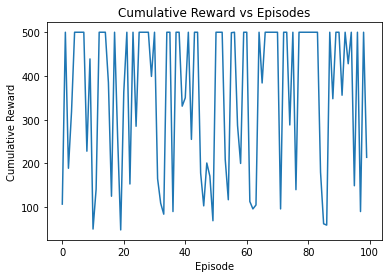

In [ ]:
# Obtaining the average cumulative reward by taking the mean of the cumulative rewards of the episodes
avg_reward = statistics.mean(all_rewards)
print("\nAverage Cumulative Reward:", avg_reward)
print("Is my agent good enough?", avg_reward > 195,"\n")

# Converting the list to a numpy array to plot the graph
all_rewards = np.array(all_rewards)

# Plot cumulative reward against all episodes
plt.plot(all_rewards)
plt.title('Cumulative Reward vs Episodes')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.show()

---




<font color="#228B22" face="Montserrat" size="+3"><h1>**Task 3:**</h1></font>

Render one episode played by the developed RL agent on Jupyter. Please refer to the sample code link for rendering code.
(10 marks)


In [ ]:
def show_video():

    mp4list = glob.glob('video/*.mp4')

    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                </video>'''.format(encoded.decode('ascii'))))

    else: 
      print("Could not find video")

In [ ]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")

# Reset the environment and discretize the initial observation
observation = discretize(env.reset())

# Run the agent in the environment until the episode terminates
while True:

    env.render()

    # Choose the action with the highest Q-value for the current state
    action = np.argmax(Q_table[observation])
    observation, reward, done, info = env.step(action)

    # Discretize the new observation
    observation = discretize(observation)
    
    if done: 
      break    

env.close()

show_video()

---




<font color="#228B22" face="Montserrat" size="+3"><h1>**Task 4:**</h1></font>

Format the Jupyter notebook by including step-by-step instruction and explanation, such that the notebook is easy to follow and run (refer to the tutorial section in the sample notebook). Include text explanation to demonstrate the originality of your implementation and your understanding of the code. For example, for each task, explain your approach and analyze the output; if you improve an existing approach, explain your improvements.
(20 marks)

<font face="Montserrat" size="+1"><p>Our step-by-step instructions and explanations are all embedded within the code itself in comments and in Markdown before the code block. All additional efforts and improvements to originality and understanding of this project has been prefaced with 
</p></font>
<font color="#4169E1" face="Montserrat" size="+3"><h2>Additional effort: </p></font>